In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch.utils.data import DataLoader
from torch import nn

from tqdm import tqdm
from torch.optim import Adam


In [2]:
class cnn_block(nn.Module):
  def __init__(self, in_channels = 1, n_hidden = 5, kernel_size = (2, 2), step = 1, padd = 'same'):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Conv2d(in_channels       = in_channels, out_channels = n_hidden, kernel_size = kernel_size, bias=False, padding = padd, stride=step),
        nn.BatchNorm2d(num_features = n_hidden),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Conv2d(in_channels       = n_hidden, out_channels = in_channels, kernel_size = kernel_size, bias=False, padding = padd, stride=step),
        nn.BatchNorm2d(num_features = in_channels),
        nn.ReLU(),
        nn.Dropout(p=0.2))

  def forward(self, x):
    return x + self.layers(x)

class linear_block(nn.Module):
  def __init__(self, in_features, n_hidden):
    super().__init__()
    self.in_features = (in_features, n_hidden)
    self.layers = nn.Sequential(
        nn.Linear(in_features = in_features, out_features = n_hidden),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(in_features = n_hidden, out_features = in_features),
        nn.ReLU()
    )

  def forward(self, x):
    return x + self.layers(x)

class CNNClassifier(nn.Module):
  def __init__(self, in_channels = 3, cnn_channels = 3, linear_hidden = 1000, n_classes = 3, kernel_size = (2, 2), step = 1, padd = 'same'):
    super().__init__()
    self.cnn_layers = nn.Sequential(
        cnn_block(in_channels, cnn_channels, kernel_size, step=step, padd = padd),
        cnn_block(in_channels, cnn_channels, kernel_size, step=step, padd = padd),
        cnn_block(in_channels, cnn_channels, kernel_size, step=step, padd = padd))

    self.down_sample = nn.Conv2d(in_channels = in_channels, out_channels = 1, kernel_size = (1, 1))

    self.linear_layers = nn.Sequential(
        linear_block(28*28, linear_hidden),
        linear_block(28*28, linear_hidden)
    )
    self.last_layer = nn.Linear(28*28, n_classes)

    self.all        = nn.Sequential(
        self.cnn_layers,
        self.down_sample,
        nn.Flatten(),
        self.linear_layers,
        self.last_layer,
    )

  def forward(self, x):
    return self.all(x)

In [3]:
x_train_written = torch.from_numpy(np.load('./x_train_wr.npy'))
x_train_spoken = torch.from_numpy(np.load('./x_train_sp.npy'))
y_train = torch.from_numpy(pd.read_csv('./y_train.csv').to_numpy())

x_train_written = x_train_written[:,None,:]
x_train_written = torch.reshape(x_train_written,(60000,1,28,28))
print(f"x_train_written shape: {x_train_written.shape}")



x_test_written = torch.from_numpy(np.load('./x_test_wr.npy'))
x_test_spoken = torch.from_numpy(np.load('./x_test_sp.npy'))
x_test_written = x_test_written[:,None,:,:]

x_train_written shape: torch.Size([60000, 1, 28, 28])


In [4]:
y_train_vals = y_train.T[1]
print(y_train.T[1])

train_written = torch.utils.data.TensorDataset(x_train_written,y_train_vals)
train_spoken = torch.utils.data.TensorDataset(x_train_spoken,y_train_vals)

tensor([7, 3, 4,  ..., 2, 1, 2])


In [5]:
train_written_subset, valid_written_subset = torch.utils.data.random_split(train_written,[.8,.2])
train_spoken_subset, valid_spoken_subset = torch.utils.data.random_split(train_spoken,[.8,.2])

train_written_dataloader = DataLoader(train_written_subset, batch_size=64, shuffle=True)
valid_written_dataloader = DataLoader(valid_written_subset, batch_size=64, shuffle=True)

train_spoken_dataloader = DataLoader(train_spoken_subset, batch_size=64, shuffle=True)
valid_spoken_dataloader = DataLoader(valid_spoken_subset, batch_size=64, shuffle=True)

test_written_dataloader = DataLoader(x_test_written, batch_size=64, shuffle=False)
test_spoken_dataloader  = DataLoader(x_test_spoken , batch_size=64, shuffle=False)

In [10]:
print(x_train_spoken.shape)

torch.Size([60000, 507])


***Training CNN***

cuda


100%|██████████| 20/20 [05:45<00:00, 17.29s/it]

Training loss: 0.1466646606640826
Validations loss: 0.13777856506960123


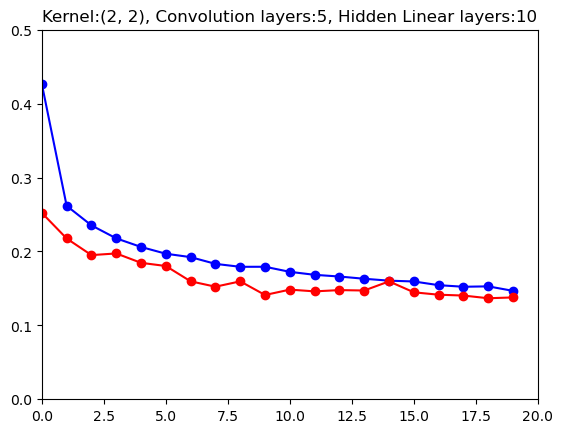

100%|██████████| 20/20 [06:13<00:00, 18.68s/it]

Training loss: 0.2075842543914344
Validations loss: 0.21968893951372293


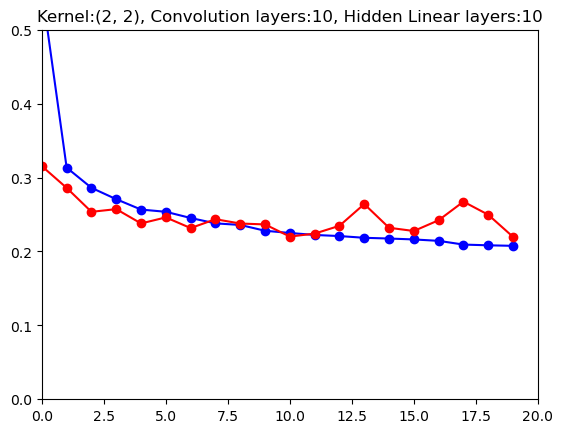

100%|██████████| 20/20 [06:28<00:00, 19.43s/it]

Training loss: 0.17476599183326333
Validations loss: 0.16547743062654144


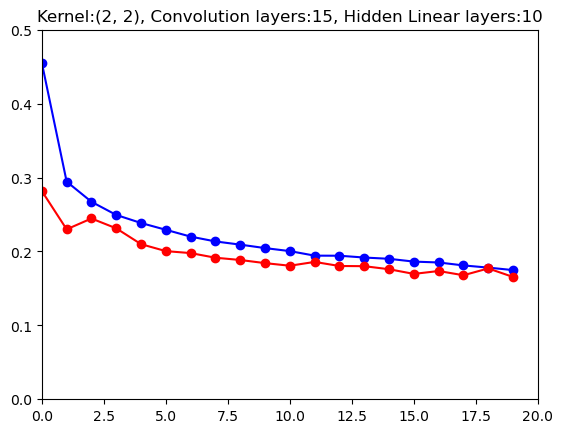

100%|██████████| 20/20 [05:33<00:00, 16.65s/it]

Training loss: 0.11624005275571968
Validations loss: 0.1354477209532358


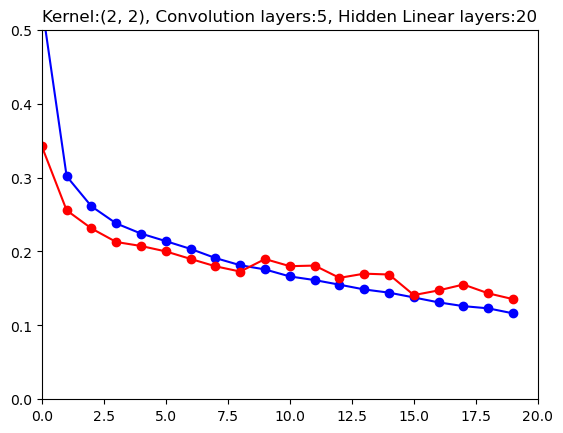

100%|██████████| 20/20 [07:03<00:00, 21.19s/it]

Training loss: 0.08941079274755638
Validations loss: 0.08949280325802329


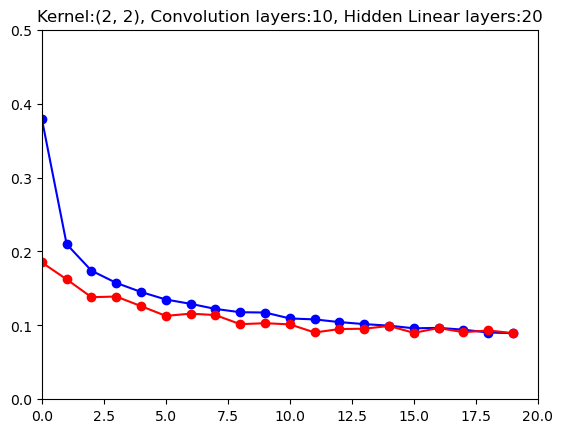

100%|██████████| 20/20 [06:35<00:00, 19.79s/it]

Training loss: 0.16960304826543296
Validations loss: 0.17497839472210755


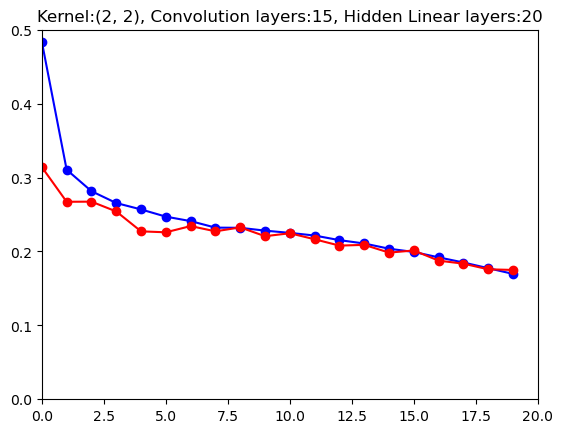

100%|██████████| 20/20 [05:40<00:00, 17.04s/it]

Training loss: 0.21001127631014493
Validations loss: 0.22179844855603012


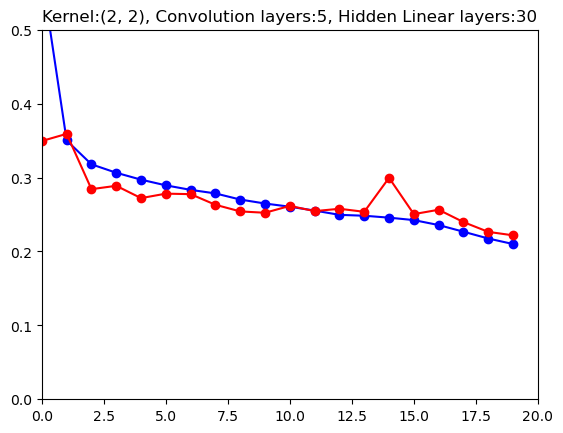

100%|██████████| 20/20 [06:24<00:00, 19.23s/it]

Training loss: 0.058982895611365486
Validations loss: 0.08776124888260374


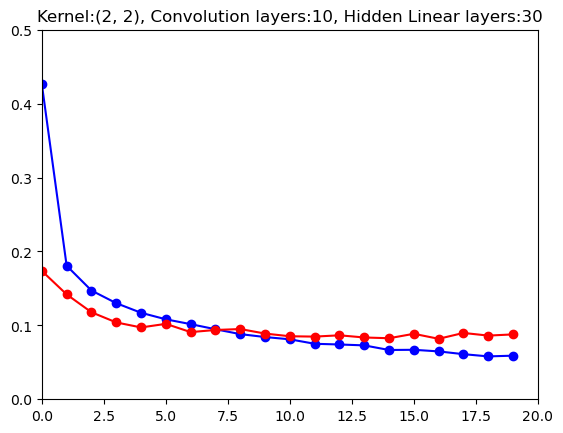

100%|██████████| 20/20 [06:47<00:00, 20.39s/it]

Training loss: 0.08926043075734369
Validations loss: 0.09739317773038304


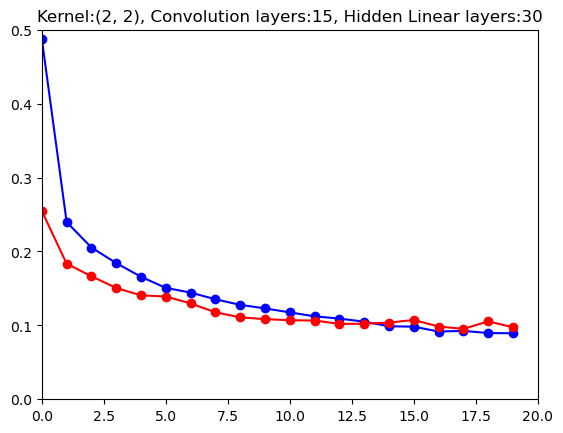

100%|██████████| 20/20 [06:46<00:00, 20.33s/it]

Training loss: 0.11051017556984168
Validations loss: 0.11115020705146708


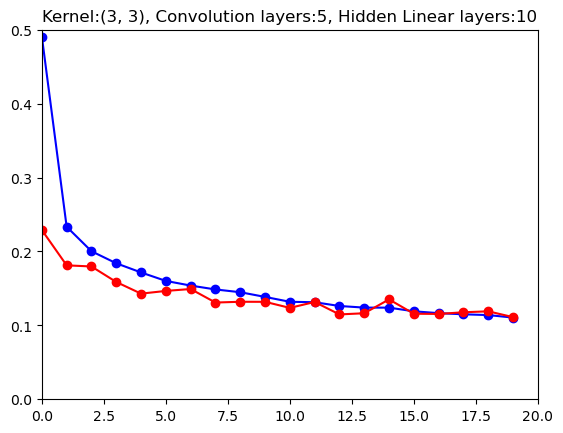

100%|██████████| 20/20 [09:08<00:00, 27.44s/it]

Training loss: 0.10097967670255449
Validations loss: 0.1024250117960103


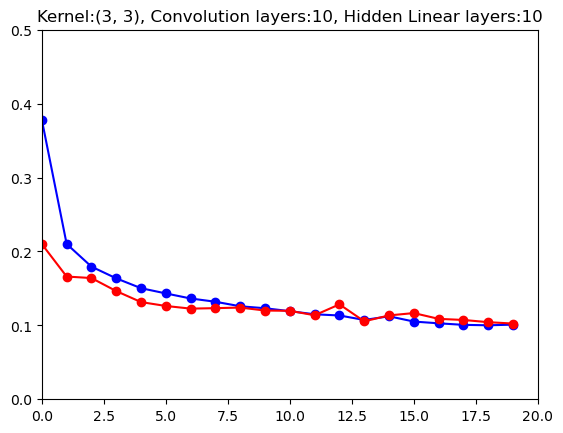

100%|██████████| 20/20 [10:18<00:00, 30.92s/it]

Training loss: 0.09443080762443117
Validations loss: 0.10544462314720096


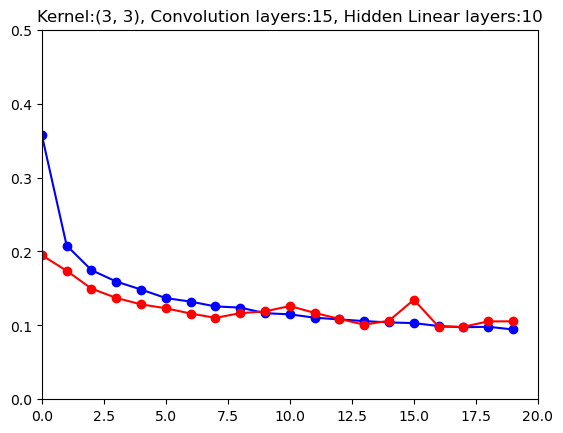

100%|██████████| 20/20 [06:49<00:00, 20.47s/it]

Training loss: 0.06869333777589956
Validations loss: 0.08143721890421719


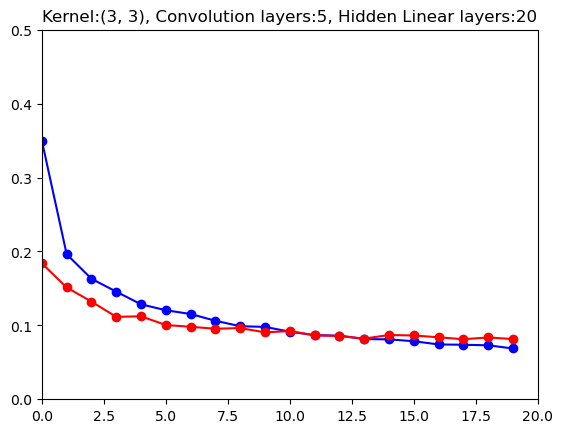

100%|██████████| 20/20 [09:12<00:00, 27.60s/it]

Training loss: 0.07015250538746928
Validations loss: 0.09194487784685641


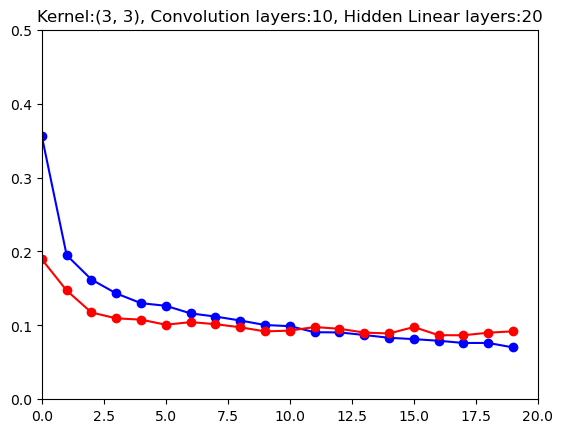

100%|██████████| 20/20 [10:27<00:00, 31.38s/it]

Training loss: 0.10145681285451497
Validations loss: 0.10047320194799342


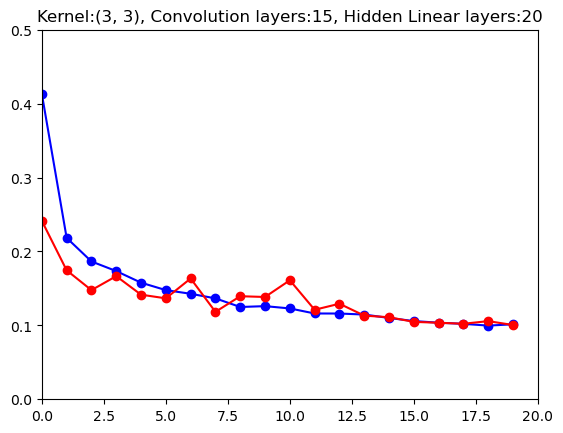

100%|██████████| 20/20 [07:00<00:00, 21.00s/it]

Training loss: 0.07550582248120223
Validations loss: 0.09082215975343277


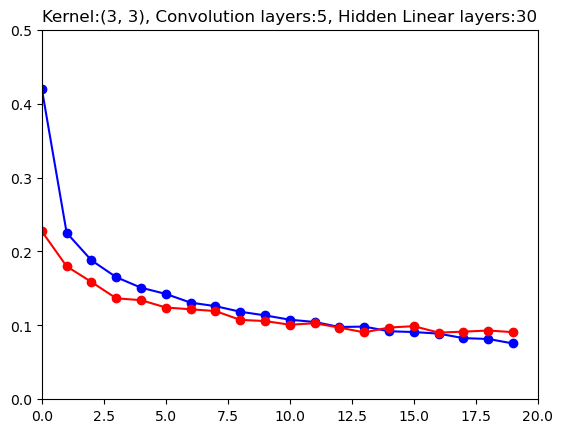

100%|██████████| 20/20 [09:22<00:00, 28.15s/it]

Training loss: 0.056917053056881384
Validations loss: 0.07687100253375641


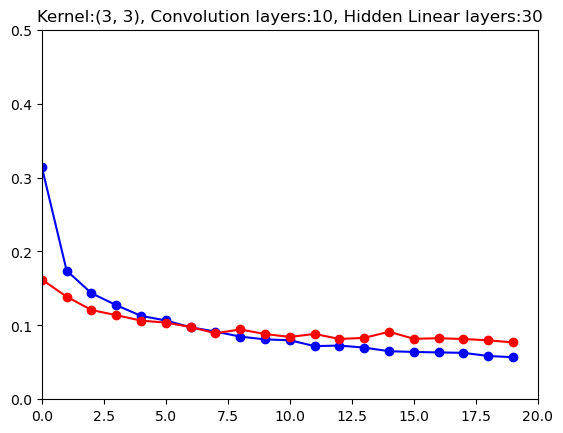

100%|██████████| 20/20 [10:31<00:00, 31.57s/it]

Training loss: 0.053327136892446295
Validations loss: 0.07034609601211757


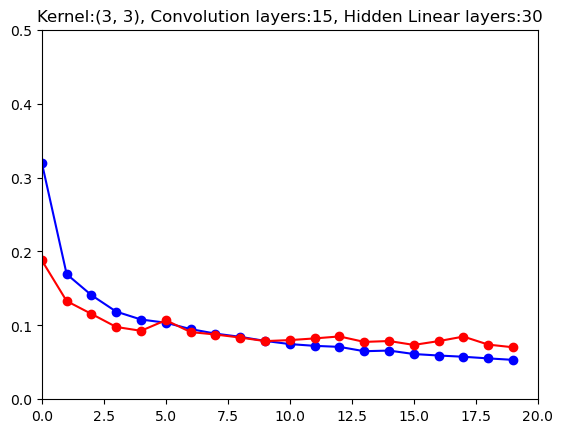

100%|██████████| 20/20 [08:44<00:00, 26.25s/it]

Training loss: 0.09095858525531006
Validations loss: 0.08958674325717889


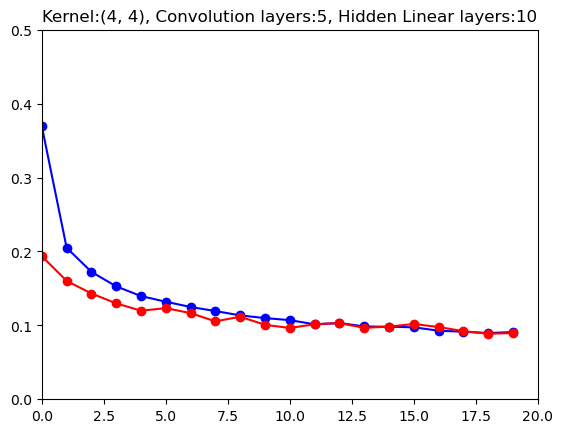

100%|██████████| 20/20 [10:33<00:00, 31.69s/it]

Training loss: 0.0718103961586507
Validations loss: 0.0771053239155784


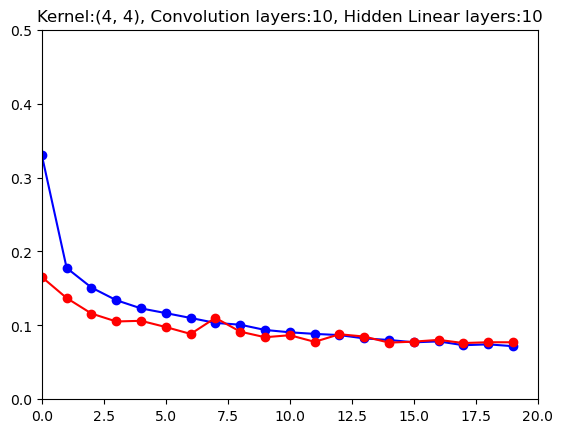

100%|██████████| 20/20 [12:36<00:00, 37.81s/it]

Training loss: 0.08563955761672781
Validations loss: 0.12154654103624563


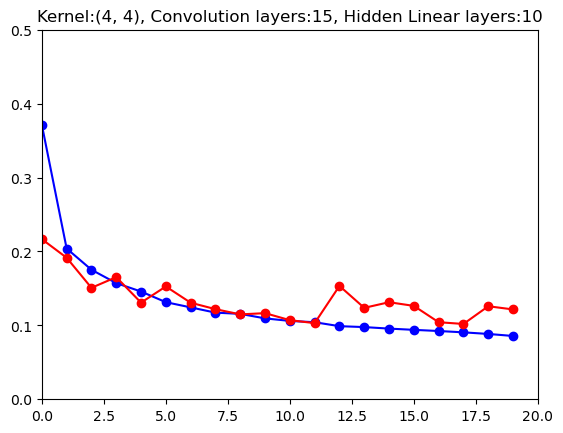

100%|██████████| 20/20 [08:55<00:00, 26.76s/it]

Training loss: 0.07059363841872283
Validations loss: 0.0720431229876597


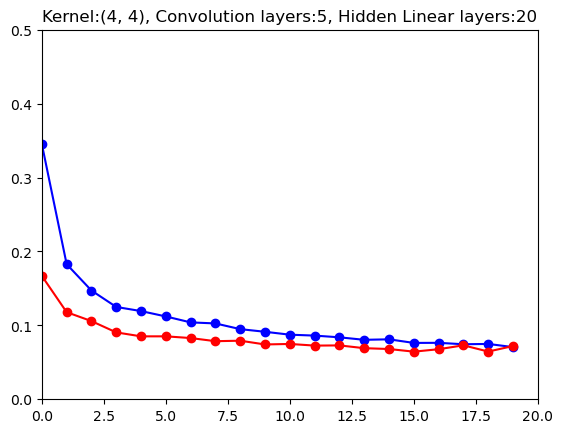

100%|██████████| 20/20 [10:40<00:00, 32.01s/it]

Training loss: 0.09768399282675037
Validations loss: 0.09676127316512902


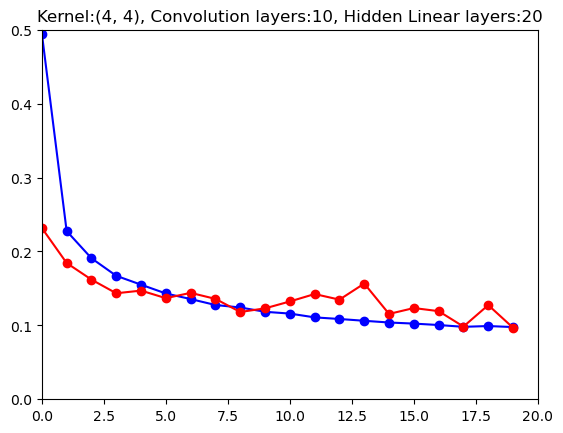

100%|██████████| 20/20 [12:35<00:00, 37.79s/it]

Training loss: 0.06602860253328885
Validations loss: 0.07923342119443014


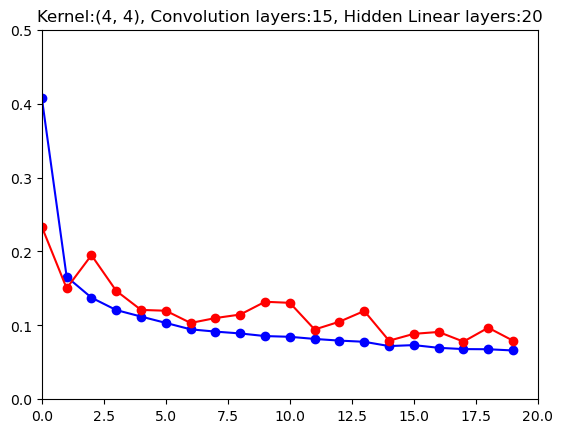

100%|██████████| 20/20 [08:55<00:00, 26.78s/it]

Training loss: 0.06755468622728208
Validations loss: 0.07412722527097942


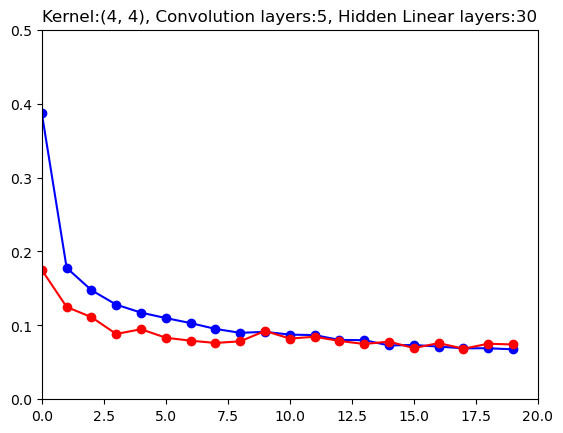

100%|██████████| 20/20 [10:51<00:00, 32.59s/it]

Training loss: 0.09233337219497142
Validations loss: 0.09407302826506894


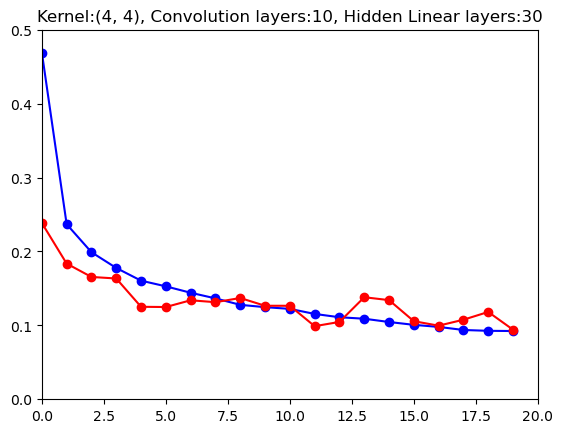

100%|██████████| 20/20 [12:48<00:00, 38.43s/it]

Training loss: 0.062183941262929664
Validations loss: 0.06413127250407935


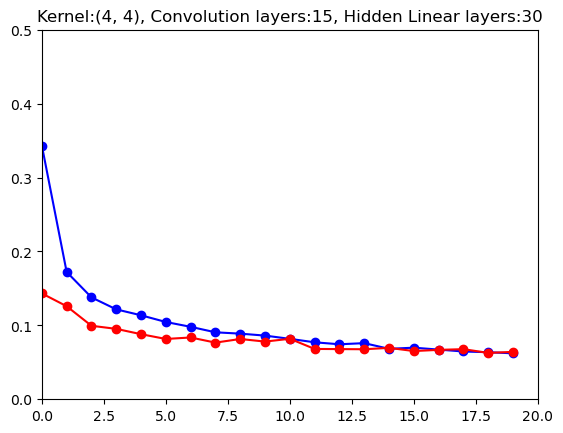

100%|██████████| 20/20 [10:22<00:00, 31.13s/it]

Training loss: 0.0758253505648341
Validations loss: 0.09074067733073461


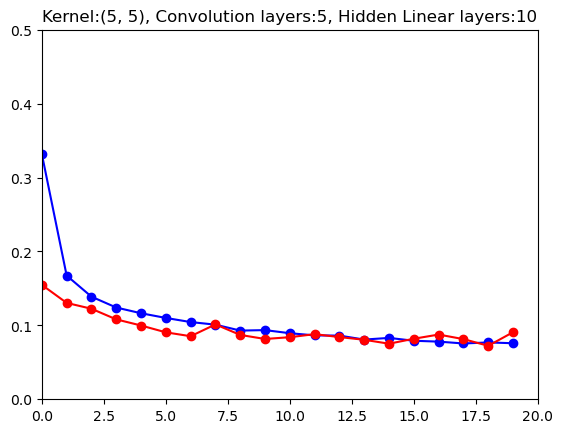

100%|██████████| 20/20 [13:45<00:00, 41.27s/it]

Training loss: 0.06259835126507901
Validations loss: 0.0987888528460203


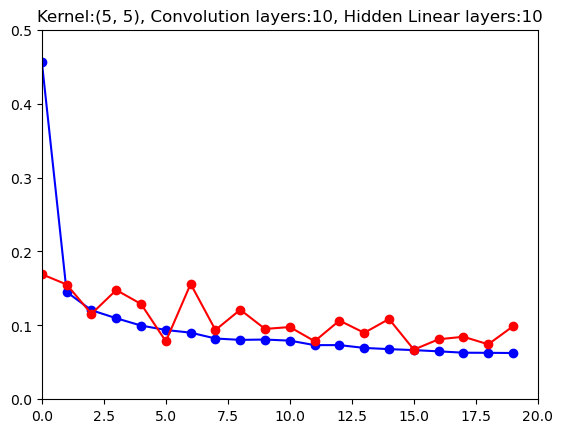

100%|██████████| 20/20 [16:40<00:00, 50.04s/it]

Training loss: 0.07232837868417161
Validations loss: 0.09990225596337937


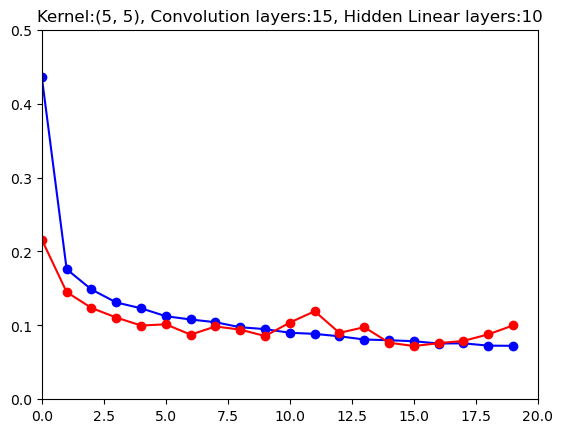

100%|██████████| 20/20 [10:24<00:00, 31.20s/it]

Training loss: 0.05408691332602717
Validations loss: 0.07148992758237896


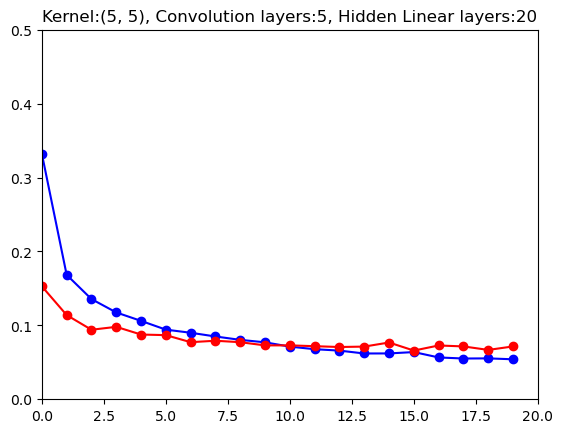

100%|██████████| 20/20 [13:44<00:00, 41.24s/it]

Training loss: 0.054905499096720406
Validations loss: 0.06047503438117567


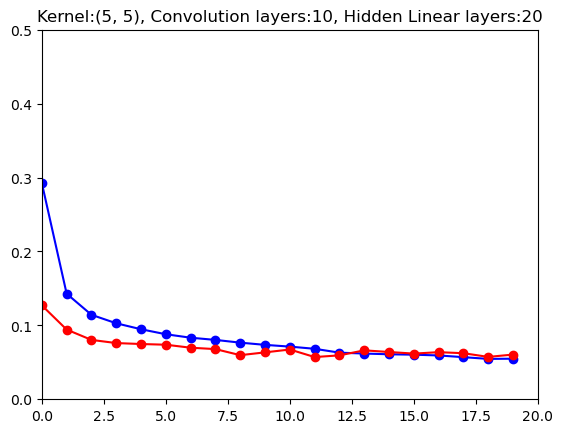

100%|██████████| 20/20 [16:53<00:00, 50.69s/it]

Training loss: 0.05275035721670183
Validations loss: 0.08368373321807418


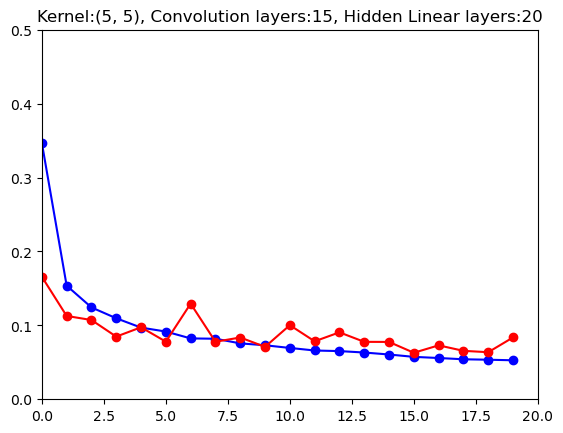

100%|██████████| 20/20 [10:35<00:00, 31.76s/it]

Training loss: 0.09757099960315756
Validations loss: 0.08779387420691316


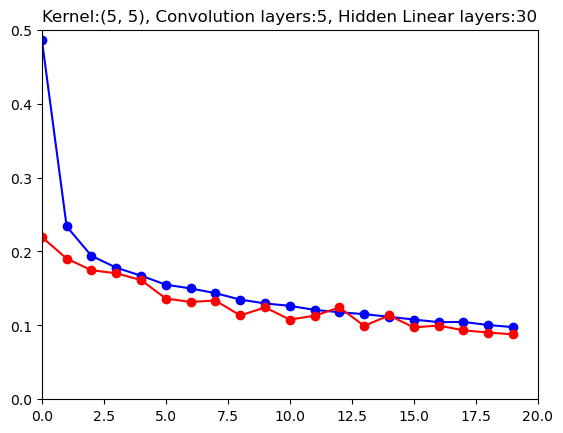

100%|██████████| 20/20 [13:52<00:00, 41.61s/it]

Training loss: 0.04636744112843929
Validations loss: 0.061988510159875145


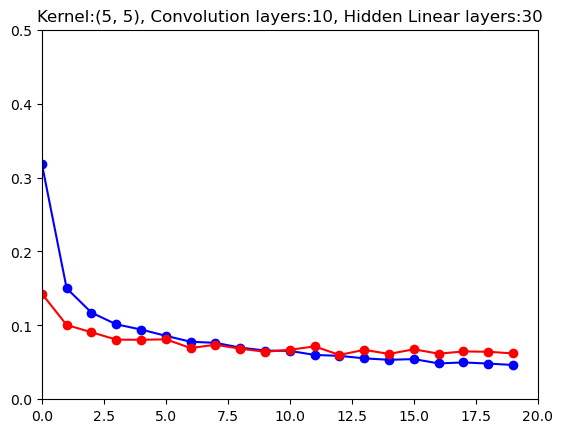

100%|██████████| 20/20 [16:47<00:00, 50.39s/it]

Training loss: 0.04184673739725349
Validations loss: 0.0519338367294409


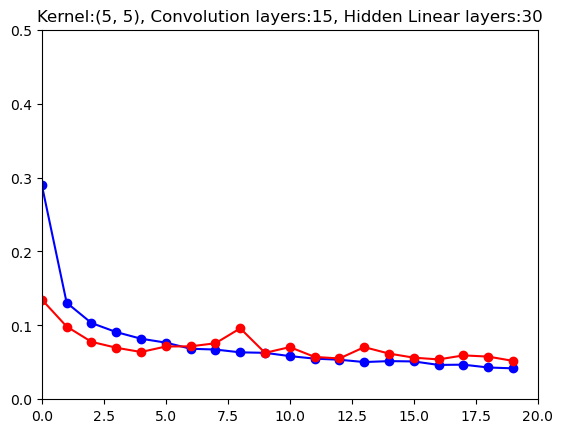

In [27]:
test_evals, train_evals = [],[]
Conv_layers = [5,10,15]
Lin_layers = [10,20,30]
n_epochs = 20

device    = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

for i in range(2,6):
    kernel = (i,i)
    for lin_channels in Lin_layers:
        for conv_channels in Conv_layers:
            
            model     = CNNClassifier(in_channels = 1,
                                      cnn_channels = conv_channels,
                                      linear_hidden = lin_channels,
                                      n_classes = 10,
                                      kernel_size = kernel,
                                      ).to(device)
            model.double()
            loss_fn   = nn.CrossEntropyLoss()
            optimizer = Adam(model.parameters(), lr = 1e-3)
            
            train_loss = []
            test_loss = []
            for epoch in tqdm(range(n_epochs)):

                # do a loop over all training samples
                model.train() # telling the model we are training it as it needs to keep track of gradients (and other things) in this modality
                epoch_train_loss = []
                for batch, (X, y) in enumerate(train_written_dataloader):

                    X, y = X.to(device), y.to(device)

                    preds = model(X)
                    #print(X)
                    #print(y)
                    loss = loss_fn(preds, y)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                    epoch_train_loss.append(loss.item())

                # do a loop over all testing samples
                model.eval() # telling the model we are evaluating it
                epoch_test_loss = []
                with torch.no_grad(): # alternatively, torch.no_grad()
                    for batch, (X, y) in enumerate(valid_written_dataloader):
                        X, y = X.to(device), y.to(device)
                        preds = model(X)
                        loss  = loss_fn(preds, y)
                        epoch_test_loss.append(loss.item())

                train_loss.append(np.mean(epoch_train_loss))
                test_loss.append(np.mean(epoch_test_loss))
            print(f"Training loss: {train_loss[-1]}")
            print(f"Validations loss: {test_loss[-1]}")
            test_evals += [test_loss[-1]]
            train_evals += [train_loss[-1]]
            plt.title(f"Kernel:{kernel}, Convolution layers:{conv_channels}, Hidden Linear layers:{lin_channels}")
            plt.plot(np.arange(epoch+1),train_loss,'-bo',label = 'Training Loss')
            plt.plot(np.arange(epoch+1),test_loss,'-ro', label = 'Testing Loss')
            plt.xlim([0, n_epochs])
            plt.ylim([0, .5])
            plt.show()


cuda


  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [17:39<00:00, 53.00s/it]

Training loss: 0.04954401244644264
Validations loss: 0.0659915157091072


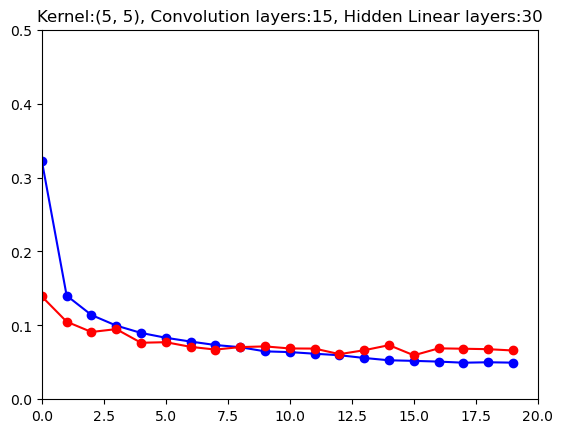

100%|██████████| 20/20 [18:02<00:00, 54.11s/it]

Training loss: 0.051166923153979096
Validations loss: 0.06200208859661568


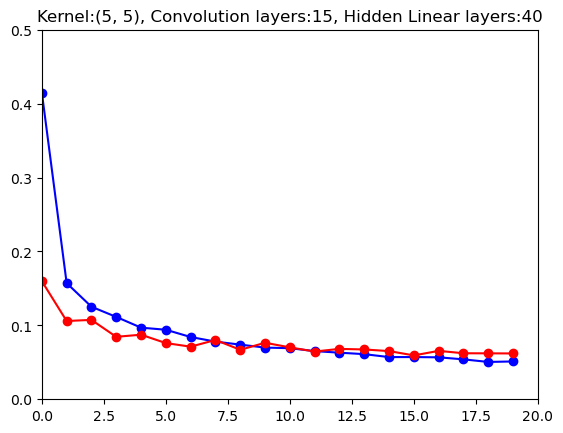

100%|██████████| 20/20 [1:11:08<00:00, 213.42s/it]

Training loss: 0.03939862734961354
Validations loss: 0.044529134643733335


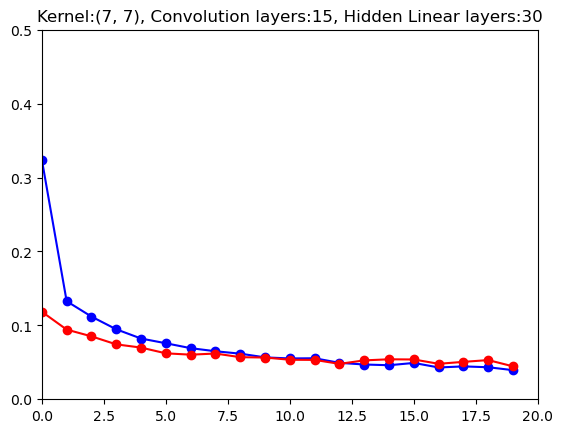

100%|██████████| 20/20 [27:10<00:00, 81.50s/it]

Training loss: 0.045596432839125706
Validations loss: 0.06121017491065928


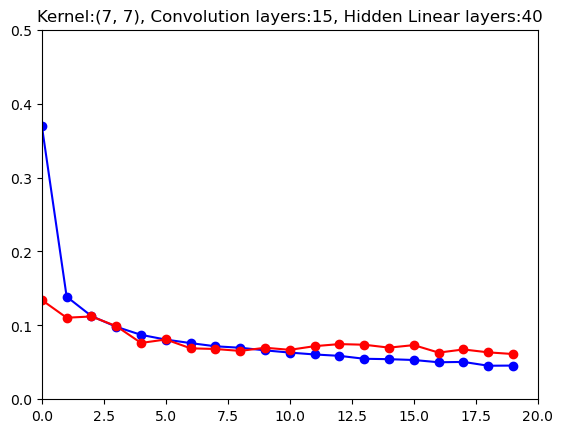

100%|██████████| 20/20 [44:18<00:00, 132.91s/it]

Training loss: 0.036512149860880194
Validations loss: 0.0502085292814088


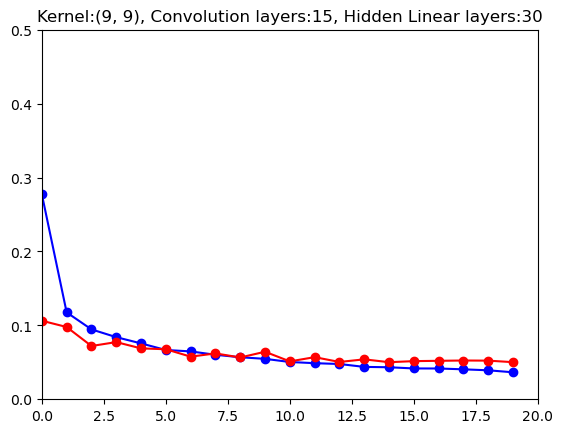

100%|██████████| 20/20 [46:52<00:00, 140.64s/it]

Training loss: 0.030794135732723087
Validations loss: 0.049688079637630986


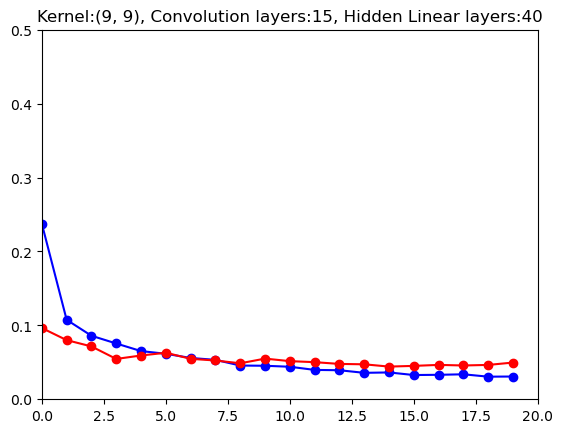

In [13]:
test_evals, train_evals = [],[]
Conv_layers = [15]
Lin_layers = [30,40]
kernels = [(5,5),(7,7),(9,9)]
n_epochs = 20

device    = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

for kernel in kernels:
    for lin_channels in Lin_layers:
        for conv_channels in Conv_layers:
            
            model     = CNNClassifier(in_channels = 1,
                                      cnn_channels = conv_channels,
                                      linear_hidden = lin_channels,
                                      n_classes = 10,
                                      kernel_size = kernel,
                                      ).to(device)
            model.double()
            loss_fn   = nn.CrossEntropyLoss()
            optimizer = Adam(model.parameters(), lr = 1e-3)
            
            train_loss = []
            test_loss = []
            for epoch in tqdm(range(n_epochs)):

                # do a loop over all training samples
                model.train() # telling the model we are training it as it needs to keep track of gradients (and other things) in this modality
                epoch_train_loss = []
                for batch, (X, y) in enumerate(train_written_dataloader):

                    X, y = X.to(device), y.to(device)

                    preds = model(X)
                    #print(X)
                    #print(y)
                    loss = loss_fn(preds, y)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                    epoch_train_loss.append(loss.item())

                # do a loop over all testing samples
                model.eval() # telling the model we are evaluating it
                epoch_test_loss = []
                with torch.no_grad(): # alternatively, torch.no_grad()
                    for batch, (X, y) in enumerate(valid_written_dataloader):
                        X, y = X.to(device), y.to(device)
                        preds = model(X)
                        loss  = loss_fn(preds, y)
                        epoch_test_loss.append(loss.item())

                train_loss.append(np.mean(epoch_train_loss))
                test_loss.append(np.mean(epoch_test_loss))
            print(f"Training loss: {train_loss[-1]}")
            print(f"Validations loss: {test_loss[-1]}")
            test_evals += [test_loss[-1]]
            train_evals += [train_loss[-1]]
            plt.title(f"Kernel:{kernel}, Convolution layers:{conv_channels}, Hidden Linear layers:{lin_channels}")
            plt.plot(np.arange(epoch+1),train_loss,'-bo',label = 'Training Loss')
            plt.plot(np.arange(epoch+1),test_loss,'-ro', label = 'Testing Loss')
            plt.xlim([0, n_epochs])
            plt.ylim([0, .5])
            plt.show()

The best performing model was the one with a 7x7 kernel 15 hidden convolution layers and 30 hidden linear layers resulting in a training loss of ~.04 and a validation loss of ~.045

***Training Final CNN Model***

In [21]:
n_epochs = 20
train_loss = []
test_loss = []
while(len(test_loss)  == 0 or test_loss[-1] > 0.047):
    train_loss = []
    test_loss = []      
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    best_model  = CNNClassifier(in_channels = 1,
                                cnn_channels = 15,
                                linear_hidden = 30,
                                n_classes = 10,
                                kernel_size = (7,7),
                                ).to(device)
    best_model.double()
    loss_fn   = nn.CrossEntropyLoss()
    optimizer = Adam(best_model.parameters(), lr = 1e-3)
    print(device)

    for epoch in tqdm(range(n_epochs)):

        # do a loop over all training samples
        best_model.train() # telling the model we are training it as it needs to keep track of gradients (and other things) in this modality
        epoch_train_loss = []
        for batch, (X, y) in enumerate(train_written_dataloader):
            X, y = X.to(device), y.to(device)

            preds = best_model(X)

            loss = loss_fn(preds, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_train_loss.append(loss.item())

        # do a loop over all testing samples
        best_model.eval() # telling the model we are evaluating it
        epoch_test_loss = []
        with torch.no_grad(): # alternatively, torch.no_grad()
            for batch, (X, y) in enumerate(valid_written_dataloader):
                X, y = X.to(device), y.to(device)
                preds = best_model(X)
                loss  = loss_fn(preds, y)
                epoch_test_loss.append(loss.item())

        train_loss.append(np.mean(epoch_train_loss))
        test_loss.append(np.mean(epoch_test_loss))

    print(f"Final Train loss: {train_loss[-1]}")
    print(f"Final Test loss: {test_loss[-1]}")

cuda


  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [23:41<00:00, 71.05s/it]


Final Train loss: 0.04188257002671843
Final Test loss: 0.06570410904104702
cuda


100%|██████████| 20/20 [23:40<00:00, 71.02s/it]


Final Train loss: 0.046469949999099605
Final Test loss: 0.0579811626582139
cuda


100%|██████████| 20/20 [23:38<00:00, 70.94s/it]

Final Train loss: 0.03838953955885735
Final Test loss: 0.04565908604461103


In [22]:
data = x_test_written.to(device)
preds = best_model(data)
index = 0
with open("preds.csv",'w+') as file:
    file.write(f"row_id,label\n")
    for pred in preds:
        file.write(f"{index},{pred.tolist().index(max(pred))}\n")
        index+=1